In [1]:
import numpy 
import pandas as pd
from  matplotlib import pyplot
import seaborn as sns
import requests
import io
from requests.auth import HTTPBasicAuth
from matplotlib.ticker import MaxNLocator
%matplotlib inline

sns.set(style='ticks')

In [2]:
response = requests.get('http://secret-url', stream=True)

In [3]:
df  = pd.read_json(response.content.decode('utf-8'))

In [6]:
df.shape[0]

917

In [7]:
df= df[df['format'].isin(['iron'])]

In [8]:
df.shape[0]

447

In [9]:
df = df[['date','place','country']]

In [10]:
df.head()

,date,place,country
0,2002-10-19,worldchampionship,USA
1,2003-10-18,worldchampionship,USA
2,2004-03-01,newzealand,NZL
3,2004-10-16,worldchampionship,USA
4,2005-02-27,malaysia,MYS


In [11]:
df['Year'] = df.apply(lambda x: x.date.year, axis=1)
df['Ironman'] = df['place']
df['Country'] = df['country']

In [12]:
df.sample(1)

,date,place,country,Year,Ironman,Country
56,2007-07-22,lakeplacid,USA,2007,lakeplacid,USA


In [13]:
df = df[['Year','Ironman','Country']]

In [14]:
df.Ironman[df.Ironman=='subicbayphilippines'] = 'Philippines'
df.Ironman[df.Ironman=='mardelplata'] = 'Mar del plata'
df.Ironman[df.Ironman=='emiliaromagna'] = 'Emilia romagna'
df.Ironman[df.Ironman=='santarosa'] = 'Santa rosa'
df.Ironman[df.Ironman=='northcarolina'] = 'North carolina'
df.Ironman[df.Ironman=='laketahoe'] = 'Lake Tahoe'
df.Ironman[df.Ironman=='loscabos'] = 'Los Cabos'
df.Ironman[df.Ironman=='monttremblant'] = 'Mont tremblant'
df.Ironman[df.Ironman=='coeurdalene'] = 'Coeur d alene'
df.Ironman[df.Ironman=='westernaustralia'] = 'Western Australia'
df.Ironman[df.Ironman=='southafrica'] = 'south africa'
df.Ironman[df.Ironman=='lakeplacid'] = 'lake placid'
df.Ironman[df.Ironman=='newzealand'] = 'New zealand'
df.Ironman[df.Ironman=='worldchampionship'] = 'Kona'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ip

In [15]:
df.Ironman = df.Ironman.str.title() + ' (' + df['Country'] + ')'

In [16]:
df.head(1)

,Year,Ironman,Country
0,2002,Kona (USA),USA


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

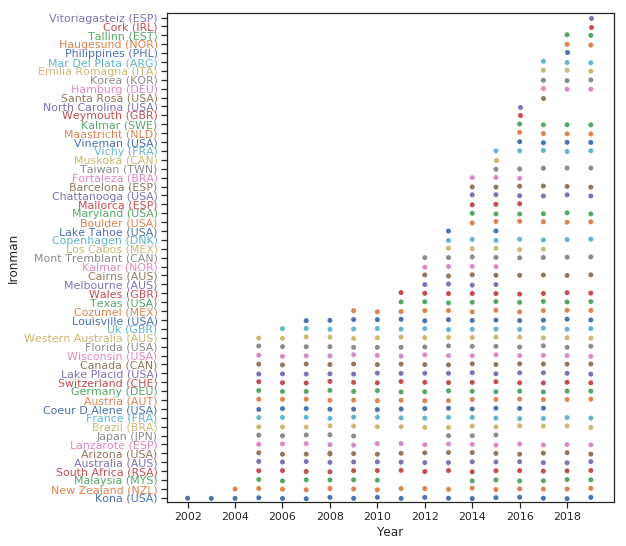

In [18]:
#fg = seaborn.FacetGrid(data=df, hue='Place', hue_order= df.Place, aspect=1.61, size=3)
#sns.factorplot(x="Year", y="Place", hue="Place", col="Year", data=df, kind="swarm");


a4_dims = (8, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

#dict_colors = {"Tallinn":"blue", "Haugesund":"green"}

#ax.get_yticklabels()[0].set_color((0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
#ax.get_yticklabels()[1].set_color((0.3333333333333333, 0.6588235294117647, 0.40784313725490196))
#ax.get_yticklabels()[2].set_color('red')

pal=sns.color_palette("deep", 100)

sns.stripplot(x="Year", y="Ironman", ax=ax, data=df, palette=pal);
ax.invert_yaxis()
# force ticks being displayed as integer values
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


[label.set_color( pal[i] ) for i, label in enumerate(ax.get_yticklabels())]

In [19]:
# count the number of ironman events per year
for y in range(2002,2020):
    ironmans_per_year = df[df['Year'] == y].shape[0]
    print('%d: %d ironmen' % (y, ironmans_per_year))

2002: 1 ironmen
2003: 1 ironmen
2004: 2 ironmen
2005: 19 ironmen
2006: 20 ironmen
2007: 21 ironmen
2008: 22 ironmen
2009: 22 ironmen
2010: 21 ironmen
2011: 22 ironmen
2012: 26 ironmen
2013: 30 ironmen
2014: 36 ironmen
2015: 40 ironmen
2016: 40 ironmen
2017: 41 ironmen
2018: 41 ironmen
2019: 42 ironmen
